# TASK 3 OASIS INFOBYTE DS INTERNSHIP

The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
df=pd.read_csv("C:/Users/Dubai Laptop/carsprice dataset.csv")

In [3]:
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [4]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df=df.rename(columns={"Present_Price":"Original_Price"})
df.head(10)

,Car_Name,Year,Selling_Price,Original_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [7]:
df.shape

(301, 9)

In [8]:
df['Car_Name'].unique()   #shows unique value

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Car_Name        301 non-null    object 
 1   Year            301 non-null    int64  
 2   Selling_Price   301 non-null    float64
 3   Original_Price  301 non-null    float64
 4   Driven_kms      301 non-null    int64  
 5   Fuel_Type       301 non-null    object 
 6   Selling_type    301 non-null    object 
 7   Transmission    301 non-null    object 
 8   Owner           301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
 # separating catagorical varaibles from df
    
categ =df[["Fuel_Type","Selling_type","Transmission"]]
categ.head()

,Fuel_Type,Selling_type,Transmission
0,Petrol,Dealer,Manual
1,Diesel,Dealer,Manual
2,Petrol,Dealer,Manual
3,Petrol,Dealer,Manual
4,Diesel,Dealer,Manual


In [11]:
# Encoding categorical columns ('Fuel_Type', 'Selling_type', 'Transmission') using LabelEncoder
# dealing with catagorical vairables 
label_encoder = LabelEncoder()

df['Fuel_Type'] = label_encoder.fit_transform(df['Fuel_Type'])
df['Selling_type'] = label_encoder.fit_transform(df['Selling_type'])
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])


In [12]:
df.head(10)       

,Car_Name,Year,Selling_Price,Original_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0
5,vitara brezza,2018,9.25,9.83,2071,1,0,1,0
6,ciaz,2015,6.75,8.12,18796,2,0,1,0
7,s cross,2015,6.50,8.61,33429,1,0,1,0
8,ciaz,2016,8.75,8.89,20273,1,0,1,0
9,ciaz,2015,7.45,8.92,42367,1,0,1,0


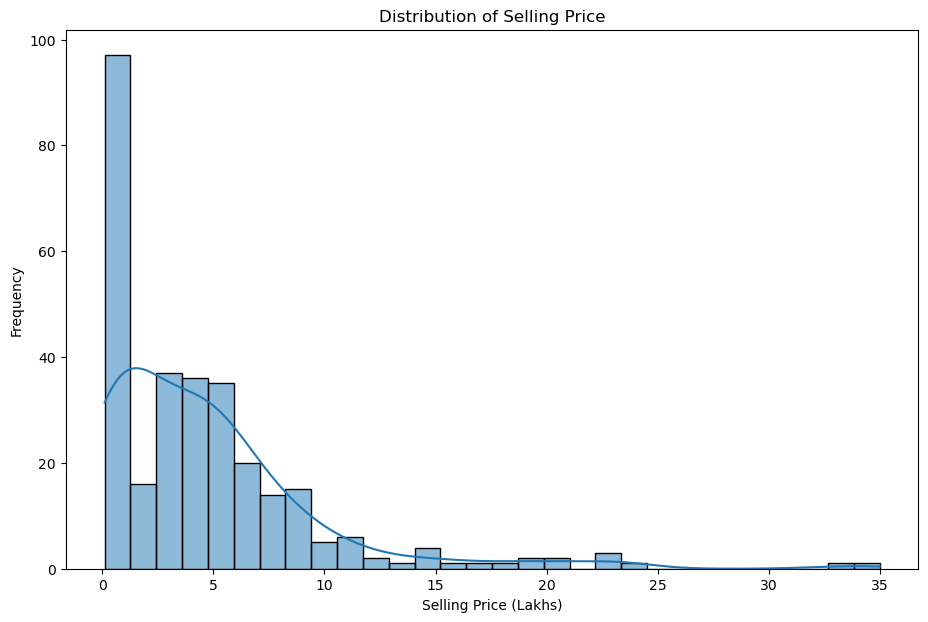

In [13]:
# Distribution of Selling Price
plt.figure(figsize=(11, 7))
sns.histplot(df['Selling_Price'], bins=30, kde=True)
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price (Lakhs)")
plt.ylabel("Frequency")
plt.show()

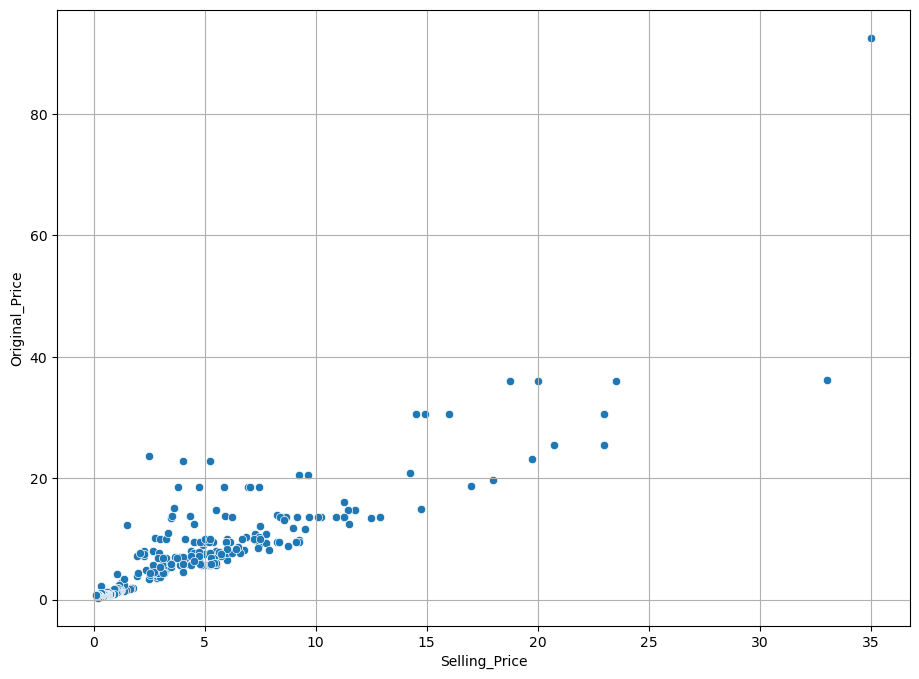

In [14]:
#scatterplot btw original and selling price

plt.figure(figsize=(11,8))
sns.scatterplot(x=df['Selling_Price'] , y=df['Original_Price'] , data=df)
plt.grid()

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

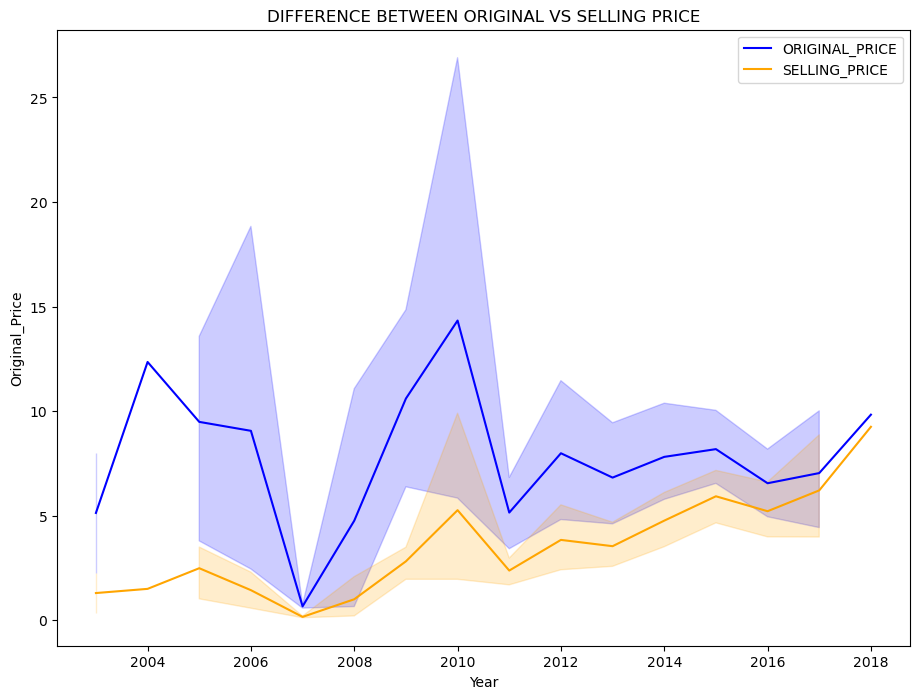

In [15]:

plt.figure(figsize=(11,8))
sns.lineplot(x=df['Year'] , y=df['Original_Price'] , data=df , color="blue" , label="ORIGINAL_PRICE")
sns.lineplot(x=df['Year'] , y=df['Selling_Price'] , data=df , color="orange" , label="SELLING_PRICE")
plt.legend()
plt.title("DIFFERENCE BETWEEN ORIGINAL VS SELLING PRICE")
plt.grid

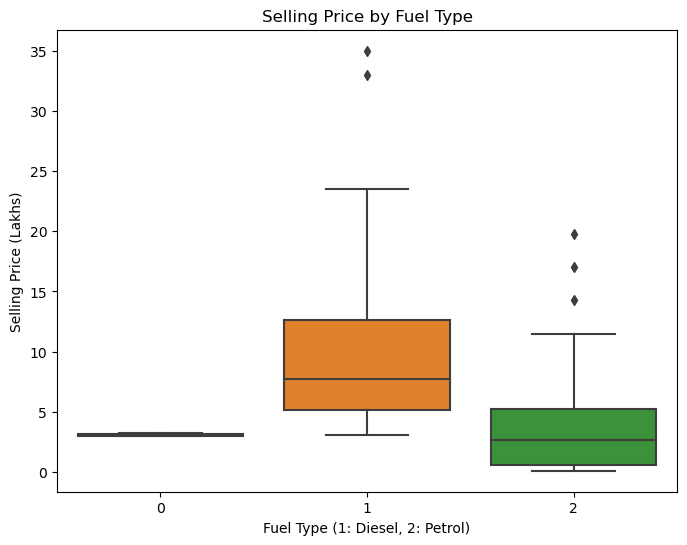

In [16]:
# Box plot to see the distribution of Selling Price based on Fuel_Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title("Selling Price by Fuel Type")
plt.xlabel("Fuel Type (1: Diesel, 2: Petrol)")
plt.ylabel("Selling Price (Lakhs)")
plt.show()

### TRAIN TEST SPLIT

In [17]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Original_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [36]:
X = df[['Year', 'Original_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']]
y = df[['Selling_Price']]

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X, y , test_size=0.2 , random_state=42)

In [45]:
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [47]:
y_pred=linear_model.predict(X_test)
y_pred

array([[ 2.96562958],
       [ 8.30085782],
       [ 6.05782751],
       [-1.46736816],
       [ 9.25705687],
       [ 7.03171029],
       [ 1.35032876],
       [ 0.82691573],
       [ 1.36987479],
       [ 7.10758777],
       [ 8.74146173],
       [ 0.58642748],
       [ 8.50459253],
       [ 3.42661966],
       [ 6.50292735],
       [ 3.08732011],
       [ 0.46492161],
       [10.89305942],
       [ 1.76225878],
       [ 2.36483065],
       [ 0.37623881],
       [ 7.73151022],
       [ 6.20981391],
       [ 2.65038024],
       [ 0.78195056],
       [ 3.72251099],
       [ 5.3340761 ],
       [ 2.84078903],
       [ 2.15815992],
       [ 1.77018609],
       [ 0.37934652],
       [ 8.79022344],
       [-0.69755203],
       [ 2.30364091],
       [ 8.21352459],
       [ 4.54034656],
       [ 7.35264949],
       [ 7.68532992],
       [ 2.91820641],
       [ 8.08316508],
       [ 4.00325157],
       [ 4.35384555],
       [ 4.36428366],
       [ 0.60942277],
       [ 6.94443091],
       [ 0

### Model evaluation

In [48]:
# mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


Model Performance:
Mean Absolute Error (MAE): 1.2219323621756768
Mean Squared Error (MSE): 3.5315798889730603
Root Mean Squared Error (RMSE): 1.8792498207989965
R-squared (R2): 0.8466902419661907


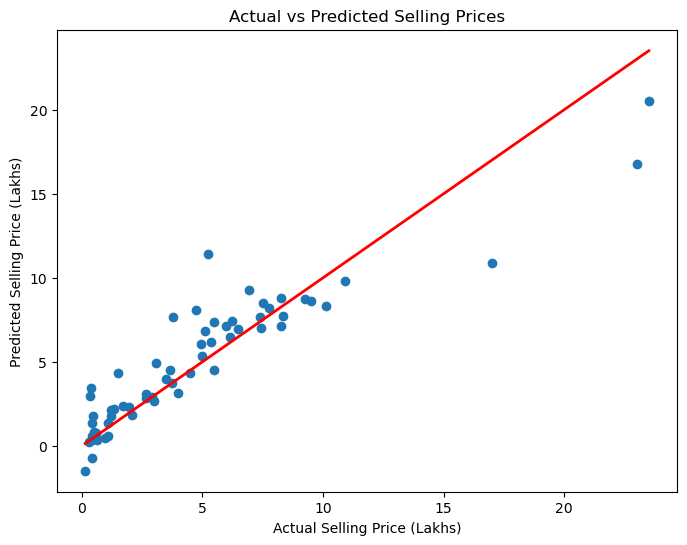

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title("Actual vs Predicted Selling Prices")
plt.xlabel("Actual Selling Price (Lakhs)")
plt.ylabel("Predicted Selling Price (Lakhs)")
plt.show()

In [50]:

# Assuming X_test is a DataFrame with a column like 'Car_Name' (or similar identifier)
X_test_copy = X_test.copy()  # Make a copy to avoid modifying the original data

# Add predicted prices to the test set
X_test_copy['Predicted_Price'] = y_pred

# If you also want the actual prices (from y_test), you can add those as well
X_test_copy['Actual_Price'] = y_test

# Display the test set with predictions
print(X_test_copy.head())


     Year  Original_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
177  2016            0.57       24000          2             1             0   
289  2016           13.60       10980          2             0             1   
228  2012            9.40       60000          1             0             1   
198  2011            0.57       35000          2             1             1   
60   2013           18.61       40001          2             0             1   

     Owner  Predicted_Price  Actual_Price  
177      0         2.965630          0.35  
289      0         8.300858         10.11  
228      0         6.057828          4.95  
198      1        -1.467368          0.15  
60       0         9.257057          6.95  
